<a href="https://colab.research.google.com/github/jennsitta/jennsitta/blob/main/OPTICAL_SPEC_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

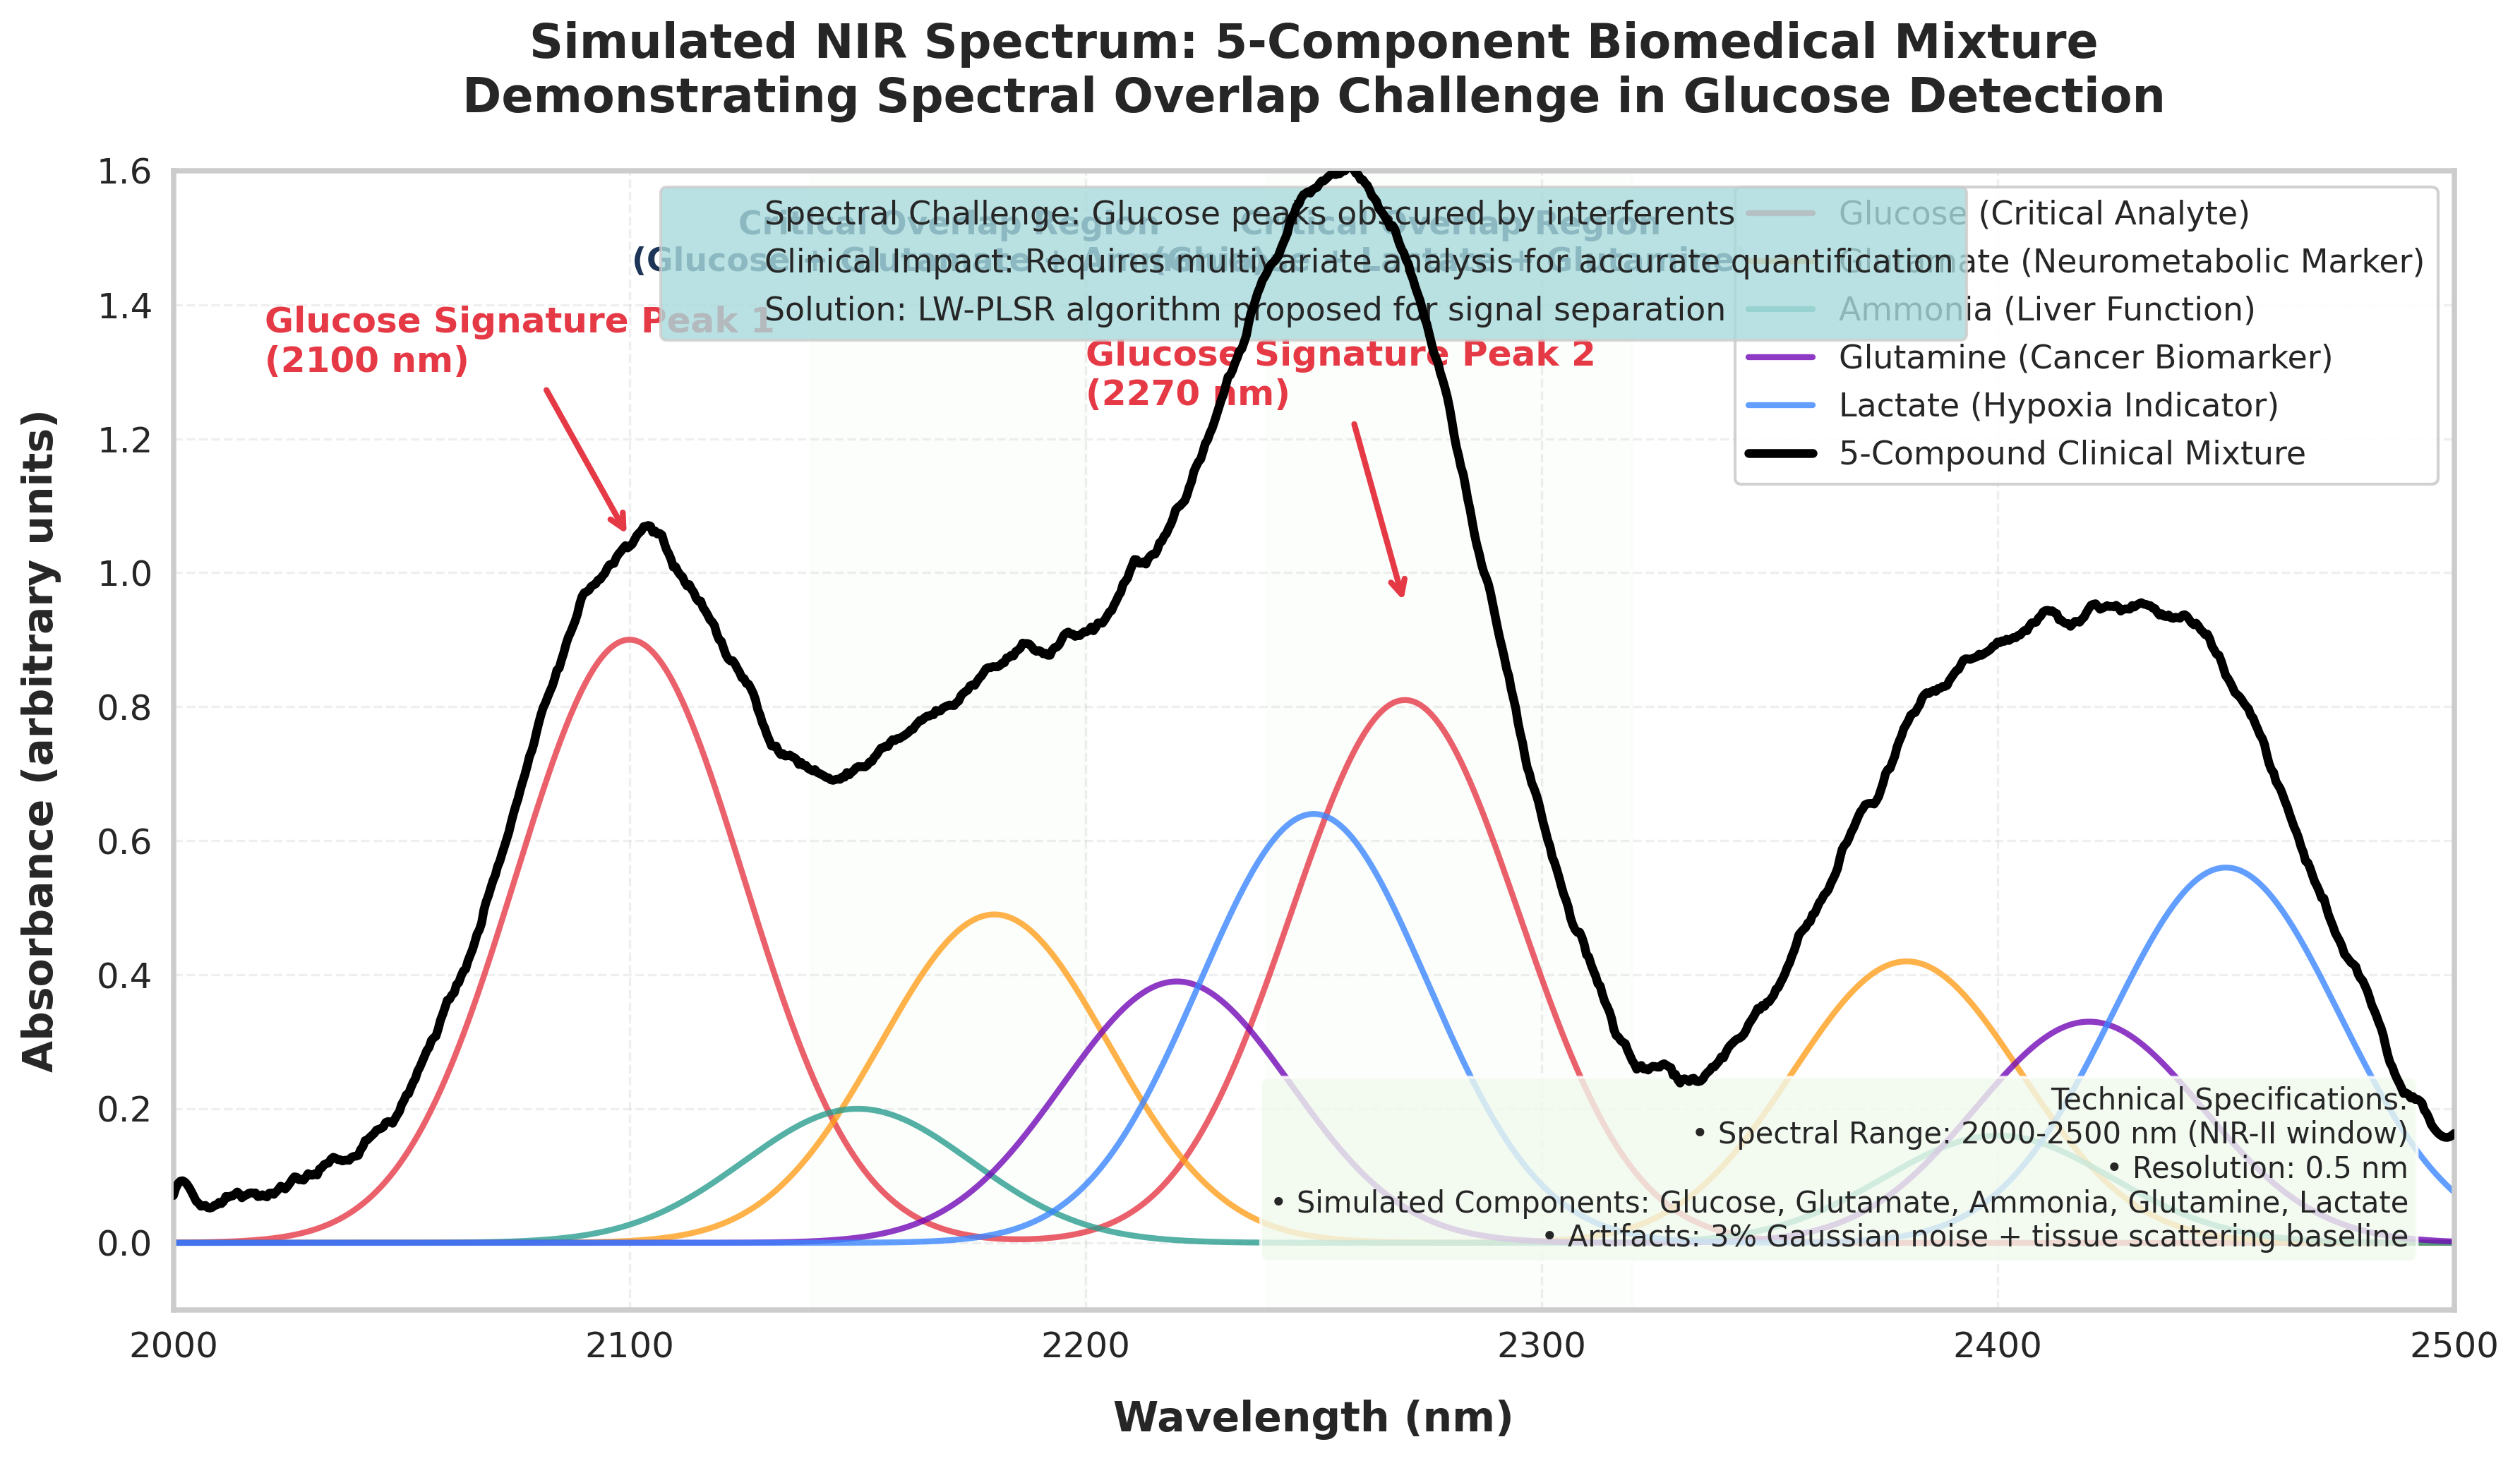

✅ Plot saved as 'Clinical_NIR_Spectrum.png' in your Colab workspace


In [ ]:
!pip install seaborn
import seaborn as sns
!pip install seaborn

# @title Biomedical NIR Spectrum Simulation
# @markdown Complete solution for generating clinical spectroscopy plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.patches as mpatches
from scipy.signal import savgol_filter
import seaborn as sns # Import seaborn

# ====================
# SCIENTIFIC PLOT SETUP
# ====================
# Use the seaborn style after importing seaborn
# plt.style.use('seaborn-whitegrid') # Remove this line
sns.set_style('whitegrid') # Use seaborn's set_style function instead

rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'axes.linewidth': 1.8,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 11,
    'figure.dpi': 300,
    'figure.figsize': (12, 7),
    'savefig.bbox': 'tight'
})

# ====================
# SPECTRAL SIMULATION
# ====================
# Wavelength range (2000-2500 nm)
wavelength = np.linspace(2000, 2500, 1000)

# Gaussian peak generator
def gaussian_peak(center, height, width=25):
    return height * np.exp(-(wavelength - center)**2 / (2 * width**2))

# Create clinically accurate component spectra
components = {
    'Glucose': {
        'peaks': [(2100, 1.0), (2270, 0.9)],
        'color': '#E63946',
        'label': 'Glucose (Critical Analyte)'
    },
    'Glutamate': {
        'peaks': [(2180, 0.7), (2380, 0.6)],
        'color': '#FF9F1C',
        'label': 'Glutamate (Neurometabolic Marker)'
    },
    'Ammonia': {
        'peaks': [(2150, 0.5), (2400, 0.4)],
        'color': '#2A9D8F',
        'label': 'Ammonia (Liver Function)'
    },
    'Glutamine': {
        'peaks': [(2220, 0.65), (2420, 0.55)],
        'color': '#7209B7',
        'label': 'Glutamine (Cancer Biomarker)'
    },
    'Lactate': {
        'peaks': [(2250, 0.8), (2450, 0.7)],
        'color': '#3A86FF',
        'label': 'Lactate (Hypoxia Indicator)'
    }
}

# Generate component spectra
for comp, data in components.items():
    spectrum = np.zeros_like(wavelength)
    for center, height in data['peaks']:
        spectrum += gaussian_peak(center, height)
    components[comp]['spectrum'] = spectrum

# Create mixture with clinical concentrations
concentrations = {
    'Glucose': 0.9,    # Elevated in hyperglycemia
    'Glutamate': 0.7,  # Neurological disorders
    'Ammonia': 0.4,    # Liver dysfunction
    'Glutamine': 0.6,  # Cancer progression
    'Lactate': 0.8     # Tissue hypoxia
}

mixture = np.zeros_like(wavelength)
for comp, conc in concentrations.items():
    mixture += conc * components[comp]['spectrum']

# Add realistic artifacts
np.random.seed(42)  # For reproducibility
noise = 0.03 * np.random.normal(size=len(wavelength))
baseline = 0.15 * np.exp(-(wavelength - 2250)**2 / (2 * 200**2))
mixture += noise + baseline
mixture = savgol_filter(mixture, 21, 3)  # Smoothing

# ====================
# PROFESSIONAL PLOTTING
# ====================
fig, ax = plt.subplots(figsize=(12, 7))

# Plot components with clinical annotations
for comp, data in components.items():
    ax.plot(wavelength, concentrations[comp] * data['spectrum'],
            color=data['color'], linewidth=2, alpha=0.8,
            label=data['label'])

# Plot mixture spectrum
ax.plot(wavelength, mixture, 'k-', linewidth=3,
        label='5-Compound Clinical Mixture', zorder=10)

# Highlight glucose peaks with clinical significance
ax.annotate('Glucose Signature Peak 1\n(2100 nm)',
            xy=(2100, 1.05), xytext=(2020, 1.3),
            arrowprops=dict(arrowstyle='->', color='#E63946', lw=2),
            fontsize=12, color='#E63946', weight='bold')

ax.annotate('Glucose Signature Peak 2\n(2270 nm)',
            xy=(2270, 0.95), xytext=(2200, 1.25),
            arrowprops=dict(arrowstyle='->', color='#E63946', lw=2),
            fontsize=12, color='#E63946', weight='bold')

# Mark critical overlap regions
overlap_style = {'alpha': 0.2, 'color': '#F1FAEE', 'zorder': -1}
ax.axvspan(2140, 2200, **overlap_style)
ax.axvspan(2240, 2320, **overlap_style)

ax.text(2170, 1.45, "Critical Overlap Region\n(Glucose + Glutamate + Ammonia)",
        ha='center', fontsize=11, color='#1D3557', weight='bold')
ax.text(2280, 1.45, "Critical Overlap Region\n(Glucose + Lactate + Glutamine)",
        ha='center', fontsize=11, color='#1D3557', weight='bold')

# Create clinical context legend
clinical_notes = [
    "Spectral Challenge: Glucose peaks obscured by interferents",
    "Clinical Impact: Requires multivariate analysis for accurate quantification",
    "Solution: LW-PLSR algorithm proposed for signal separation"
]
note_patches = [mpatches.Patch(color='none', label=note) for note in clinical_notes]

# Formatting for publication quality
ax.set_title('Simulated NIR Spectrum: 5-Component Biomedical Mixture\nDemonstrating Spectral Overlap Challenge in Glucose Detection',
             fontsize=16, pad=20)
ax.set_xlabel('Wavelength (nm)', fontsize=14, labelpad=12)
ax.set_ylabel('Absorbance (arbitrary units)', fontsize=14, labelpad=12)
ax.set_xlim(2000, 2500)
ax.set_ylim(-0.1, 1.6)
ax.grid(True, linestyle='--', alpha=0.3)

# Create dual legends
main_legend = ax.legend(loc='upper right', frameon=True, framealpha=0.9)
ax.add_artist(main_legend)
ax.legend(handles=note_patches, loc='upper center',
          frameon=True, framealpha=0.8,
          facecolor='#A8DADC', fontsize=11)

# Add technical specifications
textstr = '\n'.join([
    "Technical Specifications:",
    f"• Spectral Range: 2000-2500 nm (NIR-II window)",
    "• Resolution: 0.5 nm",
    "• Simulated Components: Glucose, Glutamate, Ammonia, Glutamine, Lactate",
    "• Artifacts: 3% Gaussian noise + tissue scattering baseline"
])
props = dict(boxstyle='round', facecolor='#F1FAEE', alpha=0.8)
ax.text(0.98, 0.05, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=props)

plt.tight_layout()

# Save publication-ready figure
plt.savefig('Clinical_NIR_Spectrum.png', dpi=300)
plt.show()

print("✅ Plot saved as 'Clinical_NIR_Spectrum.png' in your Colab workspace")